In [33]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# Explicit

In [34]:
L = .01
nx, ny = 21, 21
dx = L / ( nx - 1 )
dy = L / ( ny - 1 )
x = numpy.linspace( 0., L, nx )
y = numpy.linspace( 0., L, ny )
alpha = 1e-4

T0 = numpy.full( ( ny, nx ), 20 )
T0[ 0, : ] = 100.
T0[ :, 0 ] = 100.

In [35]:
def ftcs( T0, nt, dt, dx, dy, alpha, qx = 0., qy = 0. ):
    
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    
    ny, nx = T.shape
    I, J = nx // 2, ny // 2
    
    for n in range( nt ):
        
        T[ 1:-1, 1:-1 ] = ( T[ 1:-1, 1:-1 ] + 
                           sigma_x * 
                           ( T[ 1:-1, :-2 ] - 2 * T[ 1:-1, 1:-1 ] + T[ 1:-1, 2: ] ) + 
                           sigma_y * 
                           ( T[ :-2, 1:-1 ] - 2 * T[ 1:-1, 1:-1 ] + T[ 2:, 1:-1 ] ) )
        T[ -1, : ] = T[ -2, : ] + qy * dy
        T[ :, -1 ] = T[ :, -2 ] + qx * dx
        
        if T[ J, I ] >= 70:
            
            break
            
    print( "temp:", T[ J, I ], ", time steps:", n + 1 )
        
    return T

In [36]:
nt = 500
dt = dx**2 / ( 4 * alpha )

In [37]:
T = ftcs( T0, nt, dt, dx, dy, alpha )

temp: 20 , time steps: 500


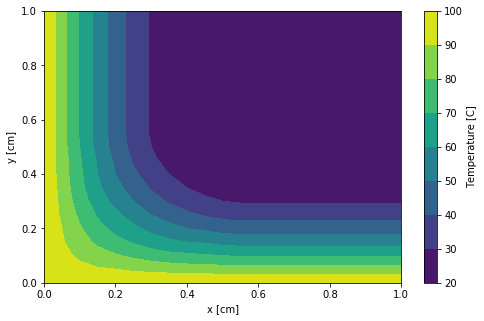

In [38]:
pyplot.figure( figsize = ( 8., 5. ) )
pyplot.xlabel( 'x [cm]' )
pyplot.ylabel( 'y [cm]' )
contf = pyplot.contourf( x * 100, y * 100, T );
cbar = pyplot.colorbar( contf )
cbar.set_label( 'Temperature [C]' )

# Implicit

In [39]:
def lhs_operator( M, N, sigma ):
    
    A = numpy.zeros( ( M * N, M * N ) )
    
    for j in range( N ):
        
        for i in range( M ):
            
            I = j * M + i
            west = I - 1
            east = I + 1
            south = I - M
            north = I + M
            
            if i == 0 and j == 0:
                
                A[ I, I ] = 1 / sigma + 4
                A[ I, east ] = -1.
                A[ I, north ] = -1.
                
            elif i == M - 1 and j == 0:
                
                A[ I, I ] = 1 / sigma + 2
                A[ I, west ] = -1.
                A[ I, north ] = -1.
                
            elif i == 0 and j == N - 1:
                
                A[ I, I ] = 1 / sigma + 3
                A[ I, east ] = -1.
                A[ I, south ] = -1.
                
            elif i == M - 1 and j == N - 1:
                
                A[ I, I ] = 1 / sigma + 2
                A[ I, west ] = -1.
                A[ I, south ] = -1.
            
            elif j == 0:
                
                A[ I, I ] = 1 / sigma + 4
                A[ I, west ] = -1.
                A[ I, east ] = -1.
                A[ I, north ] = -1.
                
            elif j == N - 1:
                
                A[ I, I ] = 1 / sigma + 3
                A[ I, west ] = -1.
                A[ I, east ] = -1.
                A[ I, south ] = -1.
                
            elif i == 0:
                
                pass
            
            elif i == M - 1:
                
                pass
            
            else:
                
                A[ I, I ] = 1 / sigma + 4
                A[ I, west ] = -1.
                A[ I, east ] = -1.
                A[ I, south ] = -1.
                A[ I, north ] = -1.
                
    return A

In [ ]:
def btcs( T0, nt, dt, delta, alpha, qx = 0., qy = 0. ):
    
    sigma = alpha * dt / delta**2
    A = lhs_operator( , sigma)
    T = map_2d_to_1d( T0 )
    
    for n in range( nt ):
        
        b = rhs_vector()
        T = numpy.linalg.solve( A, b )
        
    return map_1d_to_2d( T )